In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import re
import string

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)


In [3]:
print(df.shape)


(23486, 10)


In [4]:
df.head(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [5]:
df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count()

Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       0                    168
        1                   4909
5       0                     25
        1                  13106
Name: Recommended IND, dtype: int64

In [6]:
#Text Features:
df_data = df[['Title', 'Review Text', 'Recommended IND','Rating']]
df_data.head()

,Title,Review Text,Recommended IND,Rating
0,NaN,Absolutely wonderful - silky and sexy and comf...,1,4
1,NaN,Love this dress! it's sooo pretty. i happene...,1,5
2,Some major design flaws,I had such high hopes for this dress and reall...,0,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,5
4,Flattering shirt,This shirt is very flattering to all due to th...,1,5


In [7]:
#Merging text features:
df_data['Review'] = df_data['Title'] + ' ' + df_data['Review Text']
df_data = df_data.drop(labels=['Title','Review Text'] , axis=1)
df_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Recommended IND,Rating,Review
0,1,4,NaN
1,1,5,NaN
2,0,3,Some major design flaws I had such high hopes ...
3,1,5,"My favorite buy! I love, love, love this jumps..."
4,1,5,Flattering shirt This shirt is very flattering...


In [8]:
#Dropping null values
df_data.Review.isna().sum()

3811

In [9]:
df_data = df_data[~df_data.Review.isna()]
df_data = df_data.rename(columns={"Recommended IND": "Recommended"})
print("My data's shape is:", df_data.shape)
df_data.head()

My data's shape is: (19675, 3)


,Recommended,Rating,Review
2,0,3,Some major design flaws I had such high hopes ...
3,1,5,"My favorite buy! I love, love, love this jumps..."
4,1,5,Flattering shirt This shirt is very flattering...
5,0,2,Not for the very petite I love tracy reese dre...
6,1,5,Cagrcoal shimmer fun I aded this in my basket ...


In [10]:
#Adding Features
#Text Length:
df_data['Review_length'] =df_data['Review'].apply(len)
print(df_data.shape)
df_data.head()

(19675, 4)


,Recommended,Rating,Review,Review_length
2,0,3,Some major design flaws I had such high hopes ...,524
3,1,5,"My favorite buy! I love, love, love this jumps...",141
4,1,5,Flattering shirt This shirt is very flattering...,209
5,0,2,Not for the very petite I love tracy reese dre...,512
6,1,5,Cagrcoal shimmer fun I aded this in my basket ...,517


In [11]:
df_data['Review_length'].describe()

count    19675.000000
mean       338.450267
std        144.740126
min         23.000000
25%        217.000000
50%        336.000000
75%        496.000000
max        557.000000
Name: Review_length, dtype: float64

In [12]:
#Text Polarity
#Polarity is the emotion expressed in the sentence. It can be positive, neagtive and neutral.
#The polarity score is a float within the range [-1.0, 1.0]

In [13]:
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [15]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df_data['Review']= df_data['Review'].astype(str)

In [17]:
df_data['Polarity Score'] = df_data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_data.head(5)

,Recommended,Rating,Review,Review_length,Polarity,Polarity Score
2,0,3,Some major design flaws I had such high hopes ...,524,0.073209,0.073209
3,1,5,"My favorite buy! I love, love, love this jumps...",141,0.560714,0.560714
4,1,5,Flattering shirt This shirt is very flattering...,209,0.512891,0.512891
5,0,2,Not for the very petite I love tracy reese dre...,512,0.181111,0.181111
6,1,5,Cagrcoal shimmer fun I aded this in my basket ...,517,0.157500,0.157500


In [18]:
df_data['Sentiment'] = df_data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_data.head(5)

,Recommended,Rating,Review,Review_length,Polarity,Polarity Score,Sentiment
2,0,3,Some major design flaws I had such high hopes ...,524,0.073209,0.073209,0.073209
3,1,5,"My favorite buy! I love, love, love this jumps...",141,0.560714,0.560714,0.560714
4,1,5,Flattering shirt This shirt is very flattering...,209,0.512891,0.512891,0.512891
5,0,2,Not for the very petite I love tracy reese dre...,512,0.181111,0.181111,0.181111
6,1,5,Cagrcoal shimmer fun I aded this in my basket ...,517,0.157500,0.157500,0.157500


In [19]:
data_prep =df_data.copy()

In [20]:
#Preprocessing - text features
#Dropping punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [22]:
data_prep['Review'] = data_prep['Review'].apply(punctuation_removal)
data_prep['Review'].head()

2    Some major design flaws I had such high hopes ...
3    My favorite buy I love love love this jumpsuit...
4    Flattering shirt This shirt is very flattering...
5    Not for the very petite I love tracy reese dre...
6    Cagrcoal shimmer fun I aded this in my basket ...
Name: Review, dtype: object

In [23]:
#Stopwords:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Aqsa
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
stop = stopwords.words('english')
stop.append("beautiful")

In [26]:
#Stopwords punctuation removal
stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [27]:
#adding  stopwords:
    
clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']

In [28]:
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words and word.lower() not in clothes_list ]

In [29]:
data_prep['Review'] = data_prep['Review'].apply(stopwords_removal)
data_prep['Review'].head()

2    [major, design, flaws, high, hopes, really, wa...
3    [favorite, buy, love, love, love, jumpsuit, fu...
4    [flattering, flattering, due, adjustable, fron...
5    [petite, love, tracy, reese, dresses, one, pet...
6    [cagrcoal, shimmer, fun, aded, basket, hte, la...
Name: Review, dtype: object

In [30]:
print(data_prep['Review'])

2        [major, design, flaws, high, hopes, really, wa...
3        [favorite, buy, love, love, love, jumpsuit, fu...
4        [flattering, flattering, due, adjustable, fron...
5        [petite, love, tracy, reese, dresses, one, pet...
6        [cagrcoal, shimmer, fun, aded, basket, hte, la...
7        [shimmer, surprisingly, goes, lots, ordered, c...
8        [flattering, love, usually, get, xs, runs, lit...
9        [fun, im, 55, 125, lbs, ordered, petite, make,...
10       [looks, like, made, cheap, runs, small, esp, z...
12       [perfect, find, reliant, reviews, written, sav...
13       [runs, big, bought, xs, go, larkspur, midi, bo...
14       [pretty, party, issues, nice, choice, holiday,...
15       [nice, body, took, package, wanted, fit, badly...
16       [need, least, average, height, taller, nice, l...
17       [looks, great, pants, took, chance, blouse, gl...
18       [super, cute, cozy, flattering, super, cozy, c...
19       [stylish, comfortable, love, look, feel, tulle.

In [31]:
# Finding sentiment of review

from textblob import TextBlob

bloblist=list()

for row in df_data['Review'].astype(str):
    blob=TextBlob(row)
    bloblist.append((row,blob.sentiment.polarity,blob.subjectivity))
    df_data_senti=pd.DataFrame(bloblist,columns=['Row','Setiment','Polarity'])
  
df_data=pd.concat([df_data,df_data_senti],axis=1)
df_data.drop('Row',axis=1,inplace=True)

In [32]:
print(df_data_senti.head(10))

                                                 Row  Setiment  Polarity
0  Some major design flaws I had such high hopes ...  0.073209  0.362282
1  My favorite buy! I love, love, love this jumps...  0.560714  0.678571
2  Flattering shirt This shirt is very flattering...  0.512891  0.568750
3  Not for the very petite I love tracy reese dre...  0.181111  0.507222
4  Cagrcoal shimmer fun I aded this in my basket ...  0.157500  0.549524
5  Shimmer, surprisingly goes with lots I ordered...  0.230342  0.496581
6  Flattering I love this dress. i usually get an...  0.002500  0.380000
7  Such a fun dress! I'm 5"5' and 125 lbs. i orde...  0.201814  0.450506
8  Dress looks like it's made of cheap material D... -0.047435  0.613143
9  Perfect!!! More and more i find myself reliant...  0.307143  0.457143


In [33]:
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter

In [43]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df_data["Review"]= df_data["Review"].astype(str)

In [44]:
# Applying Model, Variable Creation
df_data['Polarity Score'] = df_data['Review'].apply(lambda x: SIA.polarity_scores(x)['compound'])
df_data['Neutral Score'] = df_data['Review'].apply(lambda x: SIA.polarity_scores(x)['neu'])
df_data['Negative Score'] = df_data['Review'].apply(lambda x: SIA.polarity_scores(x)['neg'])
df_data['Positive Score'] = df_data['Review'].apply(lambda x: SIA.polarity_scores(x)['pos'])

In [45]:
# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

In [46]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

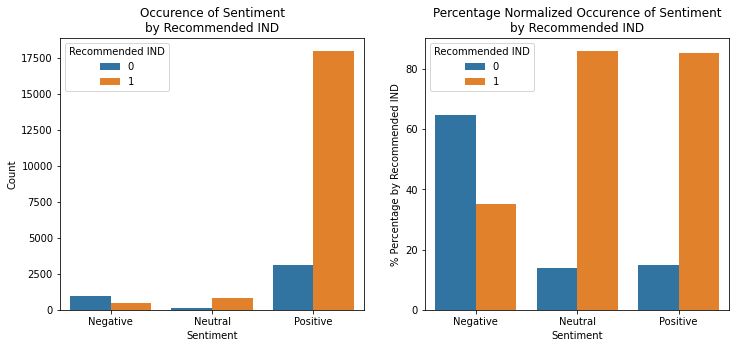

In [47]:
#Normalize Plots for Sentiment Distribution
huevar = "Recommended IND"
xvar = "Sentiment"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

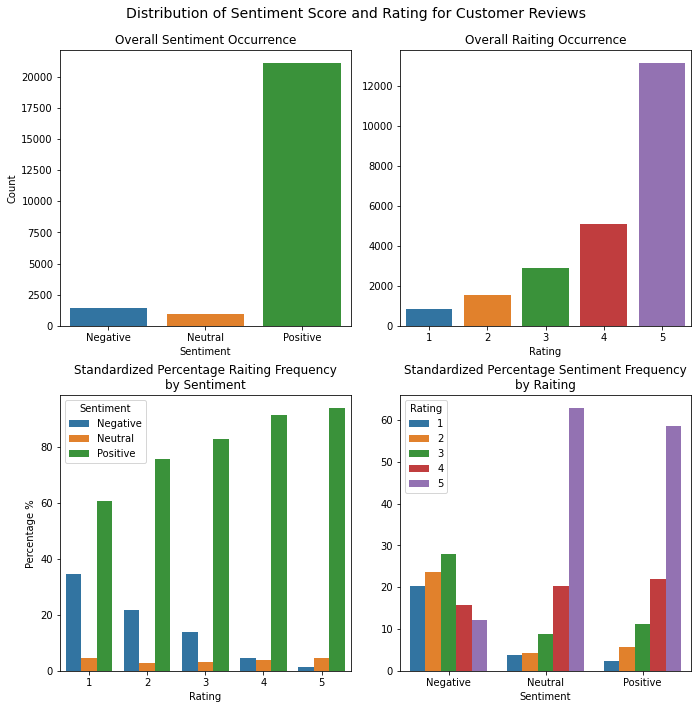

In [49]:
f, axes = plt.subplots(2, 2, figsize=[10, 10])
sns.countplot(x="Sentiment", data=df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Sentiment Occurrence")

sns.countplot(x="Rating", data=df, ax=axes[0,1])
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Raiting Occurrence")

percentstandardize_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[1,0])
axes[1,0].set_xlabel("Rating")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Raiting Frequency\nby Sentiment")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Sentiment Frequency\nby Raiting")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

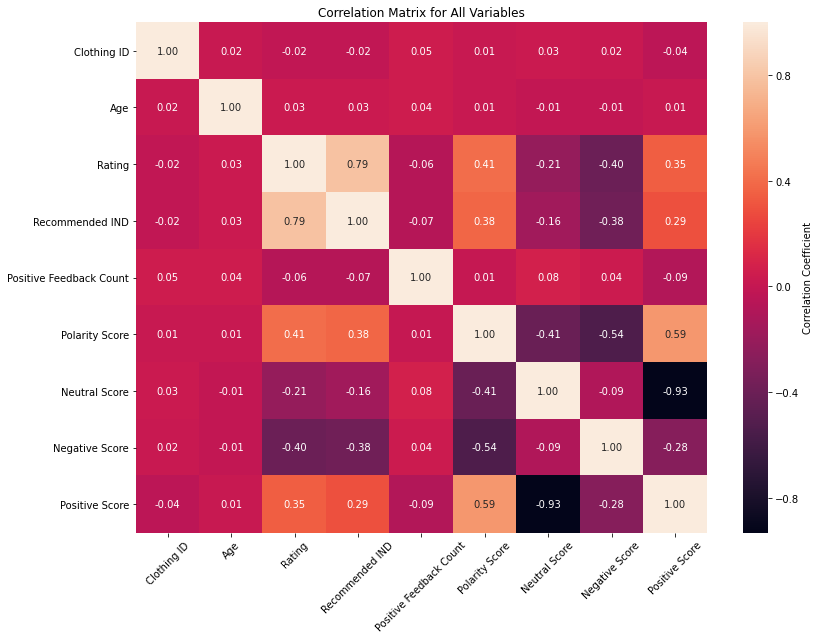

In [52]:
f, ax = plt.subplots(figsize=[12, 9])
ax = sns.heatmap(df.corr(), annot=True,
                 fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Matrix for All Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('corr-all.png', format='png', dpi=300)
plt.show()

In [30]:
#WordCloud - Repetition of words
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [31]:
pos_df = data_prep[data_prep.Recommended== 1]
neg_df = data_prep[data_prep.Recommended== 0]
pos_df.head(3)

,Recommended,Review,Review_length,Polarity
3,1,"[favorite, buy, love, love, love, jumpsuit, fu...",141,0.560714
4,1,"[flattering, flattering, due, adjustable, fron...",209,0.512891
6,1,"[cagrcoal, shimmer, fun, aded, basket, hte, la...",517,0.157500


In [32]:
pos_words =[]
neg_words = []

for review in pos_df.Review:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)
pos_words[:400]

for review in neg_df.Review:
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:400]

'major design flaws high hopes really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c petite love tracy reese dresses one petite feet tall usually brand pretty package lot l'

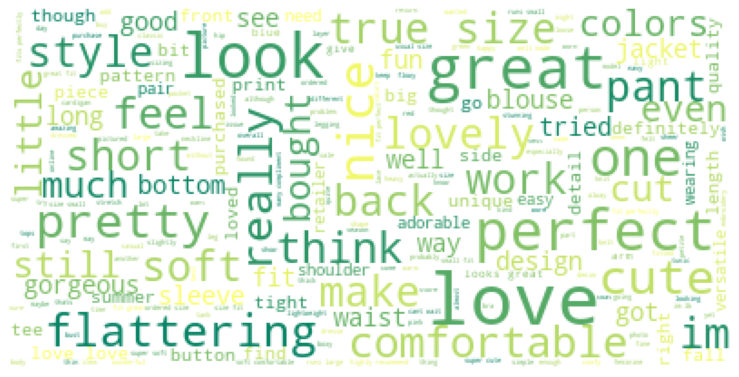

In [33]:
#Positive reviews

wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

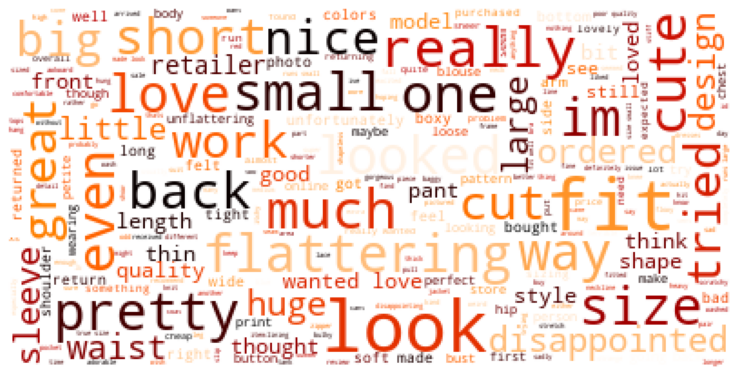

In [34]:
#Negative Reviews:

wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()